<a href="https://colab.research.google.com/github/Laggssz/Solemne1_Mineria/blob/main/Minerioa_New_South_Wales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreria y Cliente Google

Realizamos lo mismo para las zonas New Sowth Wales y South Australia

In [ ]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
from datetime import datetime



In [ ]:
client = bigquery.Client()

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
dataset_ref = client.dataset("covid19_vaccination_search_insights" , project = "bigquery-public-data")

In [ ]:
dataset = client.get_dataset(dataset_ref)

In [ ]:
tables = list(client.list_tables(dataset))

In [ ]:
for table in tables:
  print(table.table_id)

covid19_vaccination_search_insights


In [ ]:
tablref = dataset_ref.table("covid19_vaccination_search_insights")
table = client.get_table(tablref)

#Visualizacion Preelimiinar de los datos

In [ ]:
 client.list_rows(table, max_results=3000).to_dataframe()#.iloc[100:101]

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2022-04-25,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,27.924,16.237,NaN
1,2022-03-07,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,46.850,24.868,NaN
2,2021-09-27,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,68.984,26.404,NaN
3,2021-11-01,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,70.422,36.902,NaN
4,2021-05-31,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,29.903,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2021-06-21,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,48.788,20.979,6.561
2996,2022-05-02,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,13.215,7.543,1.124
2997,2022-07-25,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,11.409,6.828,1.279
2998,2022-11-14,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,6.643,3.584,NaN


# Graficos para New South Wales ~ Vacunacion

In [ ]:
rows = client.list_rows(table)

Results = []
contador = 0
fechas_un = set()

for row in rows:
    if contador >= 70:
        break
    if row[3] == "New South Wales":
        fecha = row[0]
        Vac = row[10]
        if fecha is not None and Vac is not None and fecha not in fechas_un:
            Results.append((fecha, Vac))
            fechas_un.add(fecha)
            contador += 1


results_or = sorted(Results, key=lambda x: x[0])
fechas = [x[0] for x in results_or]
Vacunas = [x[1] for x in results_or]

print("Fechas:", fechas)
print("Vacunaciones:", Vacunas)


Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 1, 18), datetime.date(2021, 1, 25), datetime.date(2021, 2, 1), datetime.date(2021, 3, 29), datetime.date(2021, 4, 19), datetime.date(2021, 5, 17), datetime.date(2021, 5, 24), datetime.date(2021, 6, 14), datetime.date(2021, 6, 21), datetime.date(2021, 6, 28), datetime.date(2021, 7, 12), datetime.date(2021, 7, 19), datetime.date(2021, 8, 2), datetime.date(2021, 8, 23), datetime.date(2021, 9, 6), datetime.date(2021, 10, 11), datetime.date(2021, 10, 18), datetime.date(2021, 11, 1), datetime.date(2021, 11, 8), datetime.date(2021, 12, 6), datetime.date(2021, 12, 13), datetime.date(2022, 1, 17), datetime.date(2022, 1, 31), datetime.date(2022, 2, 28), datetime.date(2022, 3, 14), datetime.date(2022, 3, 28), datetime.date(2022, 4, 4), datetime.date(2022, 5, 23), datetime.date(2022, 5, 30), datetime.date(2022, 6, 6), datetime.date(2022, 6, 27), datetime.date(2022, 7, 11), datetime.date(2022, 7, 25), datetime.date(2022, 8, 1), datetime.date(2

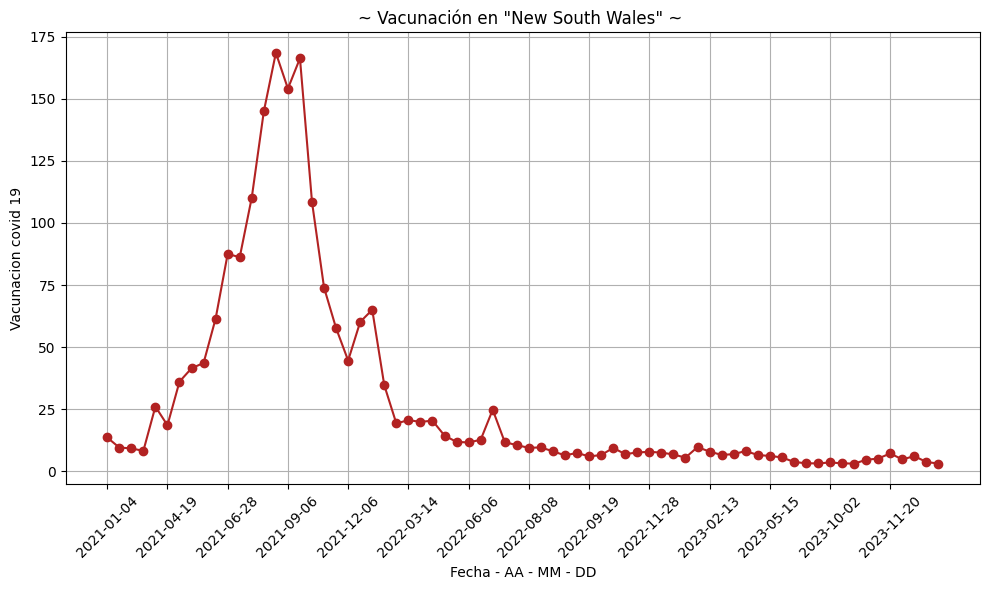

In [ ]:
fechas_str = [fecha.strftime("%Y-%m-%d") for fecha in fechas]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str, Vacunas, marker='o', linestyle='-' , color = 'firebrick')
plt.title('~ Vacunación en "New South Wales" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunacion covid 19')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficos para New South Wales ~ Intencion

In [ ]:
rows = client.list_rows(table)
Resuls1 = []
contador = 0
fechas_un1 = set()

for row in rows:
    if contador >= 70:
        break
    if row[3] == "New South Wales":
        fecha = row[0]
        Intencion1 = row[11]
        if fecha is not None and Intencion1 is not None and fecha not in fechas_un1:
            Resuls1.append((fecha, Intencion1))
            fechas_un1.add(fecha)
            contador += 1


resultados_or1 = sorted(Resuls1, key=lambda x: x[0])
fechas1 = [x[0] for x in resultados_or1 if x[0] is not None]
Intencion = [x[1] for x in resultados_or1 if x[1] is not None]


print("Fechas:", fechas1)
print("Intenciones:", Intencion)

Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 1, 18), datetime.date(2021, 1, 25), datetime.date(2021, 2, 1), datetime.date(2021, 3, 15), datetime.date(2021, 3, 29), datetime.date(2021, 4, 19), datetime.date(2021, 5, 17), datetime.date(2021, 5, 24), datetime.date(2021, 6, 14), datetime.date(2021, 6, 21), datetime.date(2021, 6, 28), datetime.date(2021, 7, 12), datetime.date(2021, 7, 19), datetime.date(2021, 7, 26), datetime.date(2021, 8, 2), datetime.date(2021, 8, 23), datetime.date(2021, 9, 6), datetime.date(2021, 10, 11), datetime.date(2021, 10, 18), datetime.date(2021, 11, 1), datetime.date(2021, 11, 8), datetime.date(2021, 12, 6), datetime.date(2021, 12, 13), datetime.date(2022, 1, 3), datetime.date(2022, 1, 17), datetime.date(2022, 1, 31), datetime.date(2022, 2, 28), datetime.date(2022, 3, 14), datetime.date(2022, 3, 28), datetime.date(2022, 4, 4), datetime.date(2022, 5, 2), datetime.date(2022, 5, 23), datetime.date(2022, 5, 30), datetime.date(2022, 6, 6), datetime.date(20

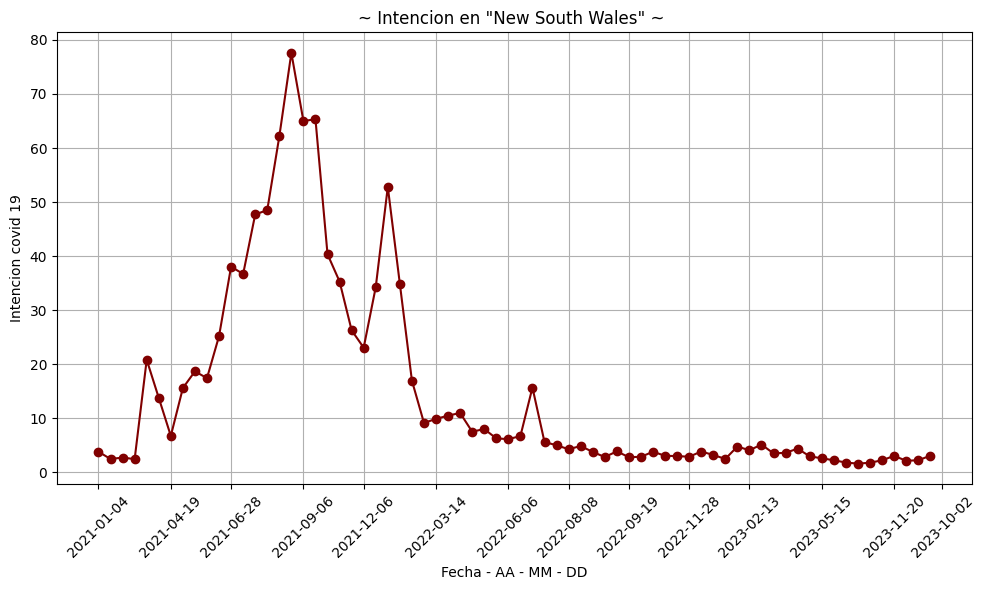

In [ ]:
#fecha_limite = datetime(2022, 4, 11)

fechas_str1 = [fecha.strftime("%Y-%m-%d") for fecha in fechas1]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str1, Intencion, marker='o', linestyle='-' , color = 'maroon')
plt.title('~ Intencion en "New South Wales" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Intencion covid 19')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.tight_layout()



#plt.xlim(fechas_str1[0], fecha_limite.strftime("%Y-%m-%d"))

# Safety Side New South Wales Australia

In [ ]:
rows = client.list_rows(table)

Results3 = []
contador = 0


for row in rows:
    if contador >= 70:
        break
    if row[3] == "New South Wales":
        fecha3 = row[0]
        Safe = row[12]
        if fecha3 is not None and Safe is not None:
            Results3.append((fecha3, Safe))
            contador += 1

results_or3 = sorted(Results3, key=lambda x: x[0])
fechas3 = [x[0] for x in results_or3 if x[0] is not None]
Safety = [x[1] for x in results_or3 if x[1] is not None]


print("Fechas:", fechas3)
print("Safety", Safety)

Fechas: [datetime.date(2021, 2, 15), datetime.date(2021, 2, 22), datetime.date(2021, 3, 8), datetime.date(2021, 3, 15), datetime.date(2021, 3, 22), datetime.date(2021, 3, 29), datetime.date(2021, 4, 5), datetime.date(2021, 4, 12), datetime.date(2021, 4, 19), datetime.date(2021, 4, 26), datetime.date(2021, 5, 3), datetime.date(2021, 5, 10), datetime.date(2021, 5, 17), datetime.date(2021, 5, 24), datetime.date(2021, 5, 31), datetime.date(2021, 6, 7), datetime.date(2021, 6, 14), datetime.date(2021, 6, 21), datetime.date(2021, 6, 28), datetime.date(2021, 7, 5), datetime.date(2021, 7, 12), datetime.date(2021, 7, 19), datetime.date(2021, 7, 26), datetime.date(2021, 8, 2), datetime.date(2021, 8, 9), datetime.date(2021, 8, 16), datetime.date(2021, 8, 23), datetime.date(2021, 8, 30), datetime.date(2021, 9, 6), datetime.date(2021, 9, 13), datetime.date(2021, 9, 20), datetime.date(2021, 9, 27), datetime.date(2021, 10, 4), datetime.date(2021, 10, 4), datetime.date(2021, 10, 11), datetime.date(2021

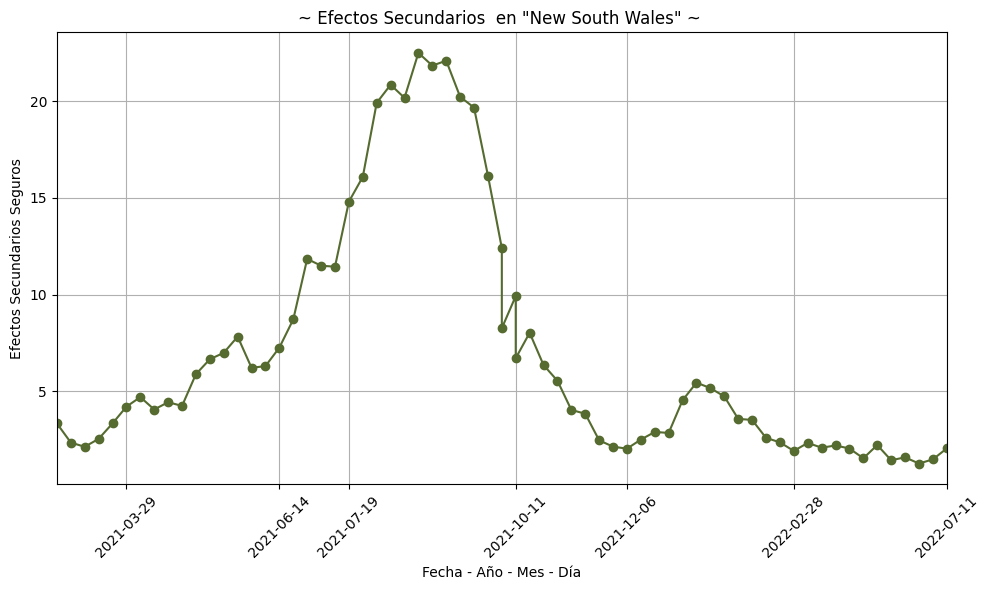

In [ ]:
fecha_limite = datetime(2022, 7, 11)

fechas_str3 = [fecha.strftime("%Y-%m-%d") for fecha in fechas3]

plt.figure(figsize=(10, 6))
plt.plot(fechas_str3, Safety, marker='o', linestyle='-', color='darkolivegreen')
plt.title('~ Efectos Secundarios  en "New South Wales" ~ ')
plt.xlabel('Fecha - Año - Mes - Día')
plt.ylabel('Efectos Secundarios Seguros')
plt.xticks(fechas_str[::4], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.xlim(fechas_str3[0], fecha_limite.strftime("%Y-%m-%d"))

plt.show()


# Union Graficos "New South Wales"

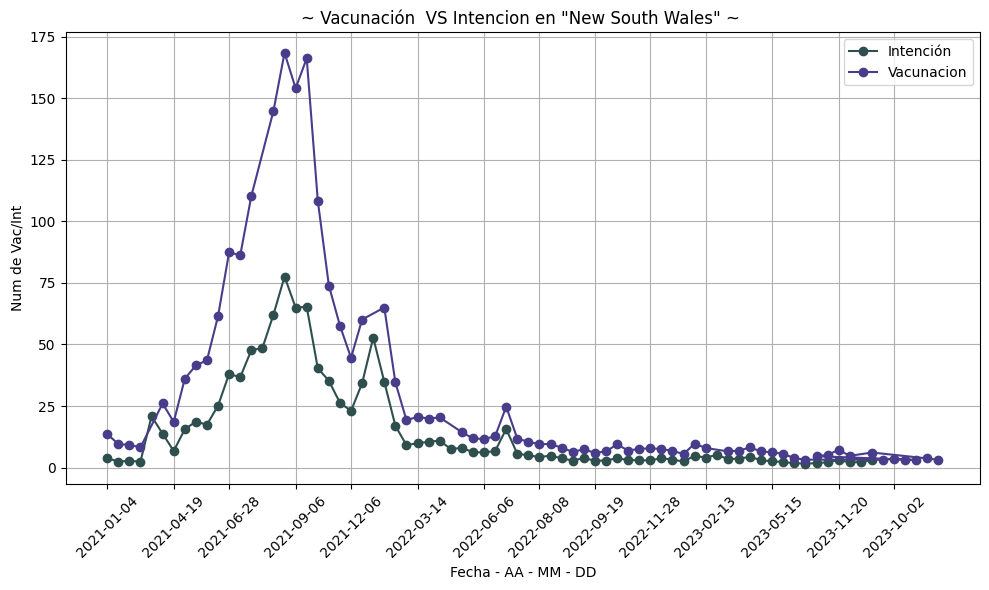

In [ ]:
fechas_str1 = [fecha.strftime("%Y-%m-%d") for fecha in fechas1]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str1, Intencion, marker='o', linestyle='-' , color = 'darkslategrey',  label='Intención' )
plt.plot(fechas_str, Vacunas, marker='o', linestyle='-' , color = 'darkslateblue' , label='Vacunacion' )
plt.title('~ Vacunación  VS Intencion en "New South Wales" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Num de Vac/Int')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

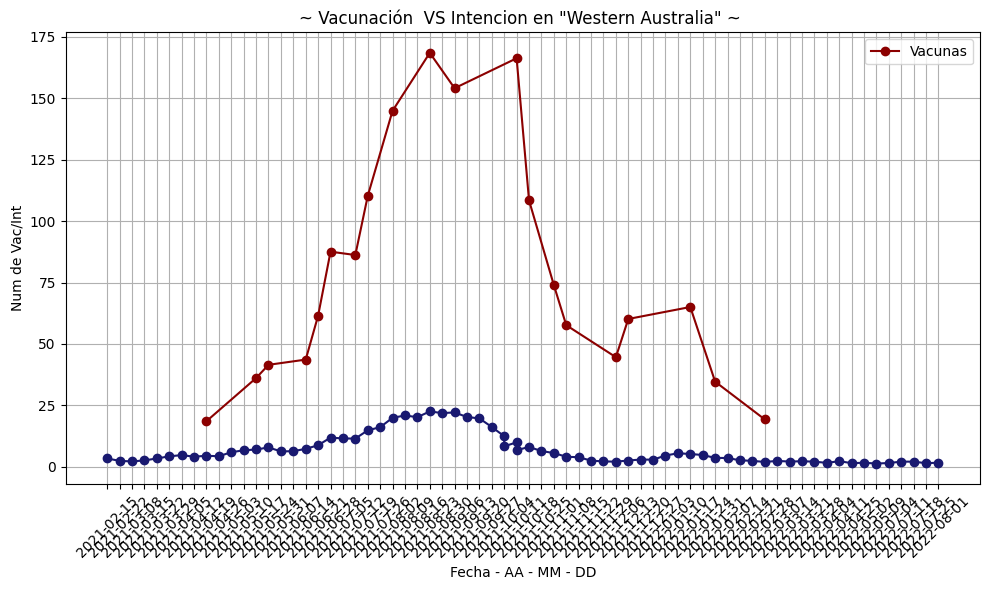

In [ ]:
fecha_liminf = datetime(2021, 4, 5)
fecha_limsup = datetime(2022, 2, 28)

fechas_str1_filtered = []
Intencion_fil = []
for fecha, dato in zip(fechas_str1, Intencion):
    fecha_dt = datetime.strptime(fecha, "%Y-%m-%d")
    if fecha_liminf <= fecha_dt <= fecha_limsup :
        fechas_str1_filtered.append(fecha)
        Intencion_fil.append(dato)

fechas_str_filtered = []
Vacunas_fil= []
for fecha, dato in zip(fechas_str, Vacunas):
    fecha_dt = datetime.strptime(fecha, "%Y-%m-%d")
    if fecha_liminf <= fecha_dt <= fecha_limsup :
        fechas_str_filtered.append(fecha)
        Vacunas_fil.append(dato)


plt.figure(figsize=(10, 6))
plt.plot(fechas_str3, Safety, marker='o', linestyle='-', color='midnightblue')
plt.plot(fechas_str_filtered, Vacunas_fil, marker='o', linestyle='-' , color='darkred', label='Vacunas')
plt.title('~ Vacunación  VS Intencion en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Num de Vac/Int')
plt.xticks( rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()